In [2]:
# Get the data


import requests

# Set up your NewsAPI key
NEWS_API_KEY = 'a8bcc3d808424f098069111c114e3ff8'

def get_news(keyword, page_size=20):
    url = f'https://newsapi.org/v2/everything?q={keyword}&apiKey={NEWS_API_KEY}&pageSize={page_size}'
    response = requests.get(url)
    articles = response.json().get('articles', [])
    
    news = []
    for article in articles:
        news.append({
            'title': article['title'],
            'description': article['description'],
            'url': article['url']
        })
    return news

# Example Usage
news_articles = get_news('technology')
for article in news_articles:
    print(article['title'], article['url'])
    print()


ReMarkable’s Paper Pro Brings a Color Screen to Its Focus-Friendly Tablet Lineup https://www.wired.com/story/remarkable-paper-pro-digital-tablet/

This is the first smart lock to support ultra-wideband https://www.theverge.com/2024/9/13/24243694/ultraloq-bolt-mission-uwb-matter-smart-lock-apple-home

A Look Inside the Airbus Factory Revolutionizing the World of Airplanes https://www.wired.com/story/heres-what-the-inside-of-an-airbus-factory-looks-like/

Hyundai’s next EV will be the three-row Ioniq 9 — and it’s headed for the US https://www.theverge.com/2024/8/28/24230636/hyundai-ioniq-9-three-row-suv-us-extended-range

A Groundbreaking Search for Alien Technology in Distant Galaxies Has Begun https://gizmodo.com/a-groundbreaking-search-for-alien-technology-in-distant-galaxies-has-begun-2000491100

U.S. Proposes Ban on Connected Car Technology From China and Russia https://gizmodo.com/u-s-proposes-ban-on-connected-car-technology-from-china-and-russia-2000501899

Everything We Know Abou

In [1]:
import random

# Define two topics
topic_1 = "natural disaster"
topic_2 = "sports event"

# Create synthetic data for topic 1 (e.g., natural disaster)
natural_disaster_events = [
    "A major earthquake hit the city causing widespread damage.",
    "Tsunami warning issued after the earthquake in coastal areas.",
    "Rescue teams are being deployed to help the victims.",
    "Citizens are urged to stay indoors and avoid damaged areas.",
    "Several buildings have collapsed due to the earthquake.",
    "Government announces relief funds for the earthquake victims."
]

# Create synthetic data for topic 2 (e.g., sports event)
sports_event_news = [
    "The football championship final will be held tomorrow.",
    "The star player scored the winning goal in the semi-final.",
    "Fans are excited about the upcoming cricket match.",
    "The stadium is packed with supporters for the final game."
]

# Generate 6 data entries for topic 1 and 4 for topic 2
synthetic_data = []

# Shuffle and assign IDs
for i, event in enumerate(natural_disaster_events):
    synthetic_data.append({'id': i+1, 'text': event, 'topic': topic_1})

for i, news in enumerate(sports_event_news):
    synthetic_data.append({'id': i+7, 'text': news, 'topic': topic_2})

# Shuffle the data
random.shuffle(synthetic_data)

# Output the synthetic data
for data in synthetic_data:
    print(f"ID: {data['id']}, Text: {data['text']}, Topic: {data['topic']}")


ID: 5, Text: Several buildings have collapsed due to the earthquake., Topic: natural disaster
ID: 3, Text: Rescue teams are being deployed to help the victims., Topic: natural disaster
ID: 6, Text: Government announces relief funds for the earthquake victims., Topic: natural disaster
ID: 4, Text: Citizens are urged to stay indoors and avoid damaged areas., Topic: natural disaster
ID: 8, Text: The star player scored the winning goal in the semi-final., Topic: sports event
ID: 2, Text: Tsunami warning issued after the earthquake in coastal areas., Topic: natural disaster
ID: 1, Text: A major earthquake hit the city causing widespread damage., Topic: natural disaster
ID: 10, Text: The stadium is packed with supporters for the final game., Topic: sports event
ID: 7, Text: The football championship final will be held tomorrow., Topic: sports event
ID: 9, Text: Fans are excited about the upcoming cricket match., Topic: sports event


In [3]:
# Preprocess the data


import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Join the tokens back into a cleaned text
    cleaned_text = " ".join(tokens)
    
    return cleaned_text

# Example Usage:
text = "Breaking: A major earthquake hit the city! Visit https://news.com for more info."
cleaned = preprocess_text(text)
print(cleaned)


break major earthquake hit city visit   info


In [4]:
# Extract Entities 

import spacy

# Function to extract named entities from text
def extract_entities(text):
    # Load spaCy's small English model
    nlp = spacy.load("en_core_web_sm")
    
    # Process the text with spaCy's NLP model
    doc = nlp(text)
    
    # Extract entities and their labels (e.g., PERSON, ORG, GPE)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return entities

# Example Usage:
text = "Barack Obama visited New York City last week to meet with Microsoft."
entities = extract_entities(text)
print(entities)


[('Barack Obama', 'PERSON'), ('New York City', 'GPE'), ('last week', 'DATE'), ('Microsoft', 'ORG')]


In [5]:
from transformers import pipeline

# Initialize the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Function to analyze sentiment of text
def analyze_sentiment(text):
    # Get the sentiment result (Positive/Negative/Neutral)
    result = sentiment_analyzer(text)
    return result

# Example Usage:
text = "I love this new phone, it's fantastic!"
sentiment = analyze_sentiment(text)
print(sentiment)


c:\Users\rans2\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\rans2\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rans2\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version th

RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [8]:
from top2vec import Top2Vec

# Function to get topics from a list of documents
def get_topics(documents):
    # Initialize the Top2Vec model
    model = Top2Vec(documents, embedding_model='universal-sentence-encoder')

    # Extract topics and their corresponding words
    topics, topic_words, word_scores, topic_scores = model.get_topics()

    return topics, topic_words, word_scores, topic_scores

# Example usage:
documents = [
    "A major earthquake hit the city causing damage.",
    "The football championship final will be held tomorrow.",
    "Rescue teams are helping victims.",
    "The star player scored the winning goal in the semi-final."
]

# Get the topics
topics, topic_words, word_scores, topic_scores = get_topics(documents)

# Display topics and keywords
for i, words in enumerate(topic_words):
    print(f"Topic {i+1}: {', '.join(words)}")


ImportError: universal-sentence-encoder is not available.

Try: pip install top2vec[sentence_encoders]

Alternatively try: pip install tensorflow tensorflow_hub tensorflow_text

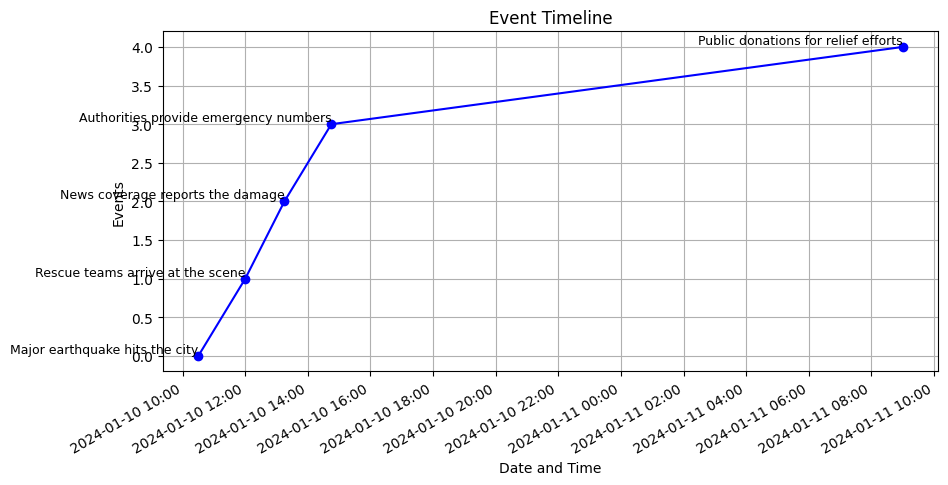

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample events with timestamps
events = [
    {"text": "Major earthquake hits the city", "date": "2024-01-10 10:30"},
    {"text": "Rescue teams arrive at the scene", "date": "2024-01-10 12:00"},
    {"text": "News coverage reports the damage", "date": "2024-01-10 13:15"},
    {"text": "Authorities provide emergency numbers", "date": "2024-01-10 14:45"},
    {"text": "Public donations for relief efforts", "date": "2024-01-11 09:00"},
]

# Convert the event dates to datetime objects
event_dates = [datetime.strptime(event['date'], "%Y-%m-%d %H:%M") for event in events]
event_texts = [event['text'] for event in events]

# Function to plot the timeline of events
def plot_timeline(events):
    plt.figure(figsize=(10, 5))
    
    # Plot event dates on the x-axis and enumerate them as y-axis labels
    plt.plot(event_dates, [i for i in range(len(event_dates))], 'bo-')

    # Label each point with the event text
    for i, text in enumerate(event_texts):
        plt.text(event_dates[i], i, text, fontsize=9, verticalalignment='bottom', horizontalalignment='right')
    
    # Format the x-axis with readable date labels
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.gcf().autofmt_xdate()

    # Add title and labels
    plt.title("Event Timeline")
    plt.xlabel("Date and Time")
    plt.ylabel("Events")
    plt.grid(True)

    plt.show()

# Plot the timeline
plot_timeline(events)
